In [5]:
import datasets
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import transformers

lambdal_outputs_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_100/2025-02-17T05-17-31.465666/details_custom|math|5_2025-02-17T05-17-31.465666.parquet 100
lambdal_outputs_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_200/2025-02-17T05-17-09.479201/details_custom|math|5_2025-02-17T05-17-09.479201.parquet 200
lambdal_outputs_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_300/2025-02-17T05-17-01.649768/details_custom|math|5_2025-02-17T05-17-01.649768.parquet 300
lambdal_outputs_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_400/2025-02-

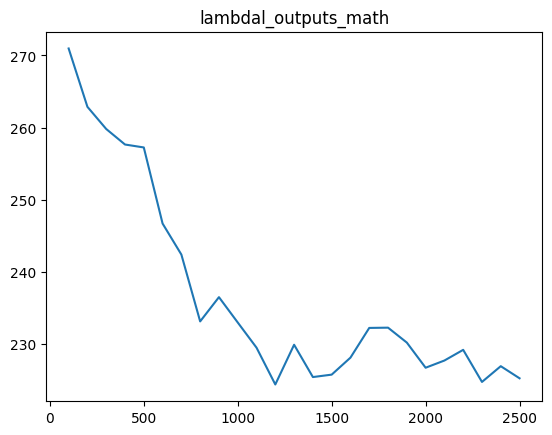

lambdal_outputs_task_math_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_100/2025-02-17T06-00-41.089768/details_custom|math|5_2025-02-17T06-00-41.089768.parquet 100
lambdal_outputs_task_math_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_200/2025-02-17T06-00-29.495174/details_custom|math|5_2025-02-17T06-00-29.495174.parquet 200
lambdal_outputs_task_math_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_300/2025-02-17T06-00-00.614001/details_custom|math|5_2025-02-17T06-00-00.614001.parquet 300
lambdal_outputs_task_math_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instru

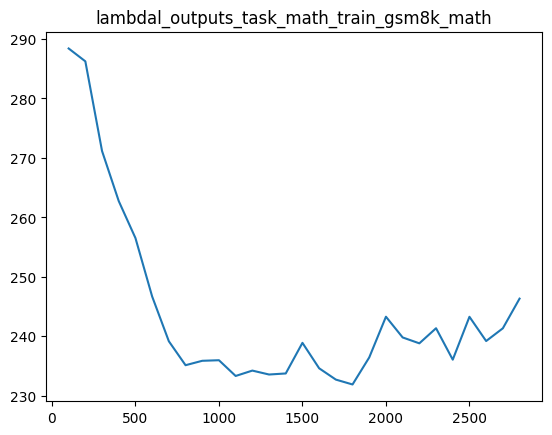

lambdal_outputs_gsm8k/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100/2025-02-17T00-41-05.187288/details_custom|gsm8k|8_2025-02-17T00-41-05.187288.parquet 100
lambdal_outputs_gsm8k/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200/2025-02-17T00-41-06.114740/details_custom|gsm8k|8_2025-02-17T00-41-06.114740.parquet 200
lambdal_outputs_gsm8k/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/2025-02-17T00-40-52.772795/details_custom|gsm8k|8_2025-02-17T00-40-52.772795.parquet 300
lambdal_outputs_gsm8k/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_4

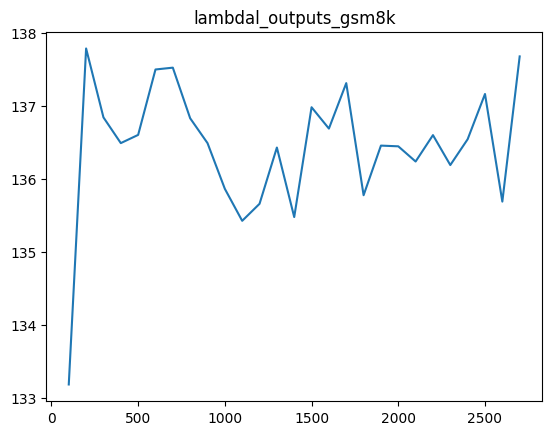

lambdal_outputs_task_gsm8k_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_100/2025-02-17T05-36-34.642266/details_custom|gsm8k|8_2025-02-17T05-36-34.642266.parquet 100
lambdal_outputs_task_gsm8k_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_200/2025-02-17T05-36-37.607680/details_custom|gsm8k|8_2025-02-17T05-36-37.607680.parquet 200
lambdal_outputs_task_gsm8k_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_300/2025-02-17T05-36-39.604684/details_custom|gsm8k|8_2025-02-17T05-36-39.604684.parquet 300
lambdal_outputs_task_gsm8k_train_gsm8k_math/details/_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open

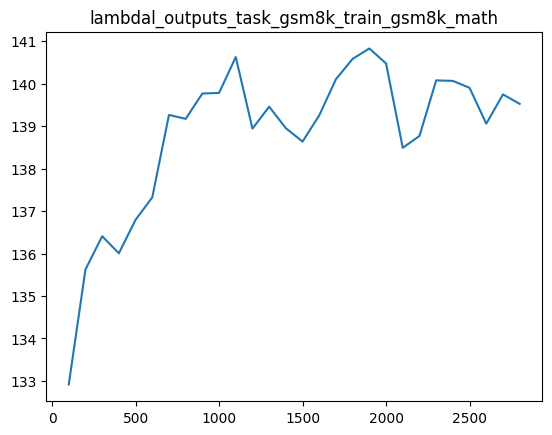

In [ ]:
from datasets.utils.logging import disable_progress_bar
disable_progress_bar()

t = transformers.AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-1.7B")

folders = list(pathlib.Path().glob("lambdal*"))
by_folder = {}
for folder in folders:
    parquets = list(folder.glob("**/*.parquet"))
    folder_key = folder.parts[0]
    by_folder[folder_key] = {}

    parquets_and_epochs = [(parquet, int(parquet.parent.parent.name.split("_")[-1])) for parquet in parquets]
    parquets_and_epochs.sort(key=lambda x: x[1])

    for parquet, epoch_no in parquets_and_epochs:
        print(parquet, epoch_no)
        array = datasets.load_dataset("parquet", data_files=[str(parquet)])
        a = array["train"].map(lambda x: {"cont_tokens": np.array(eval(x["cont_tokens"]))[0][0].shape[0]}, )
        mean = np.mean(a["cont_tokens"])
        by_folder[folder_key][epoch_no] = mean
        
    plt.plot(by_folder[folder_key].keys(), by_folder[folder_key].values())
    plt.title(folder_key)
    plt.show()


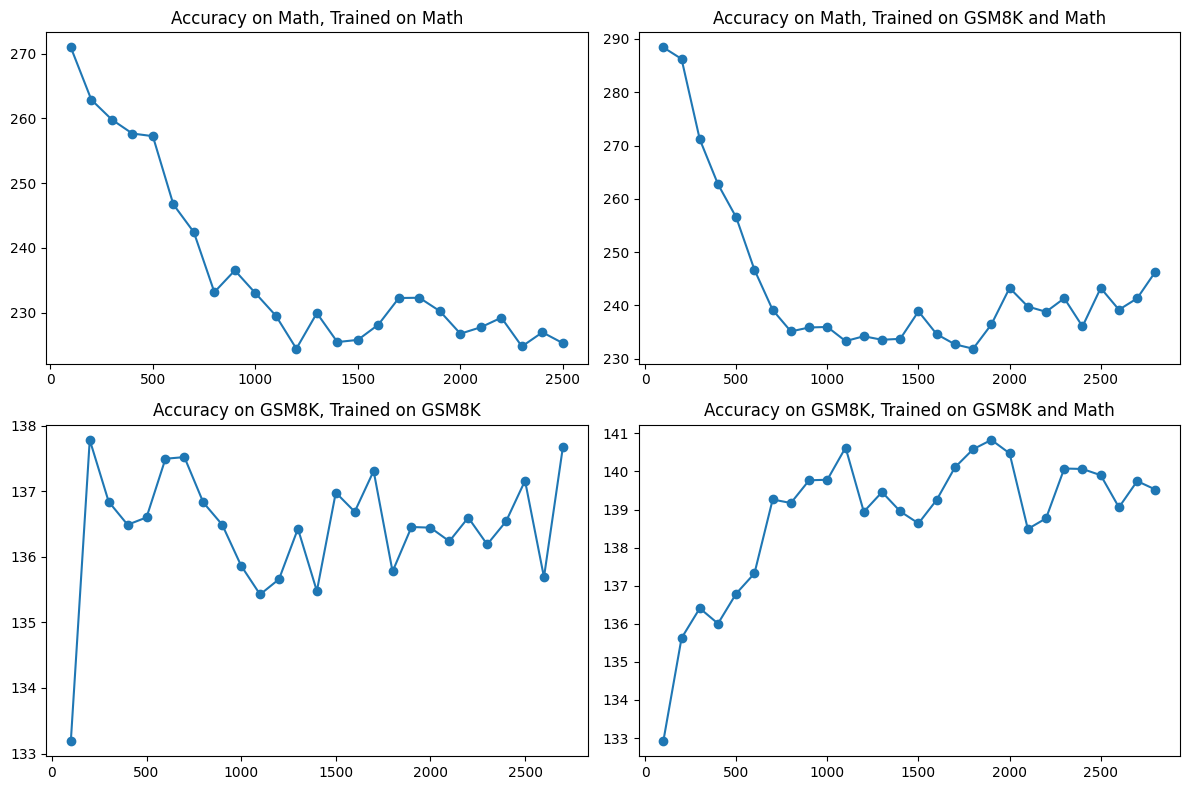

In [42]:

format_ = "Accuracy on {inference_task}, Trained on {training_task}"

titles = {
    "lambdal_outputs_gsm8k": format_.format(inference_task="GSM8K", training_task="GSM8K"),
    "lambdal_outputs_math": format_.format(inference_task="Math", training_task="Math"),
    "lambdal_outputs_task_gsm8k_train_gsm8k_math": format_.format(inference_task="GSM8K", training_task="GSM8K and Math"),
    "lambdal_outputs_task_math_train_gsm8k_math": format_.format(inference_task="Math", training_task="GSM8K and Math"), 
}

order = 

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, folder_key in enumerate(by_folder):
    axes[i].plot(by_folder[folder_key].keys(), by_folder[folder_key].values(), marker='o')
    title = titles[folder_key]
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

